# Customer Shopping Trends
![Alt Text](https://www.redpoints.com/wp-content/uploads/2019/01/fashion.png)
## Exploratory Data Analysis

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [2]:
url = 'https://raw.githubusercontent.com/Radosvet7/Project-Shopping/main/shopping_trends_updated.csv'
df = pd.read_csv(url)
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


### Data Description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

### Frequencies for categorical variables

In [4]:
for column in df.select_dtypes(include='object'):
    print(df[column].value_counts())
    print("\n")

Male      2652
Female    1248
Name: Gender, dtype: int64


Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64


Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64


Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mex

### Summary Stats for numerical variables

In [5]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


* The average customer age is **44 years**, when youngest being **18 years** and oldest **70 years old**
* Average spending by customer being **59.8 USD** with minimum spending marked at **20 USD** and maximum **100 USD**
* Previous purchases averages at **25.35**, which indicates that the majority of the clients are regular shoppers
* Review Ratings average at **3.74**, which indicates that the clients believe products quality is above average in the 1-5 scale

<AxesSubplot:>

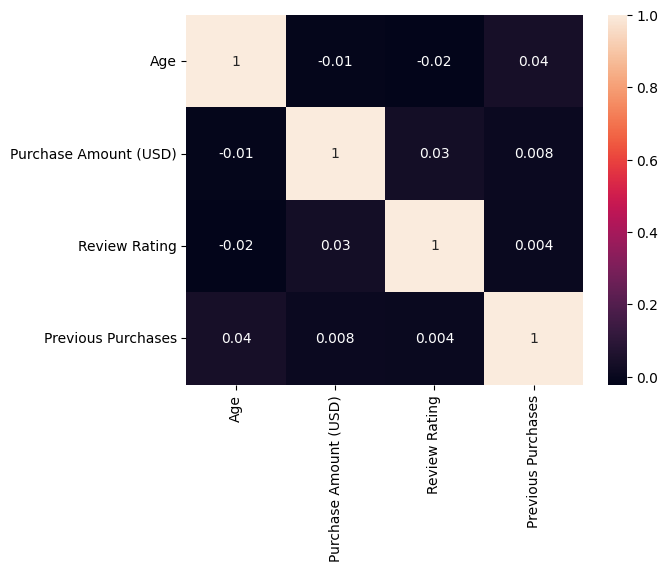

In [6]:
correl = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].corr()
sns.heatmap(correl,annot=True,fmt=".1g")

* There is no correlation between these numerical variables

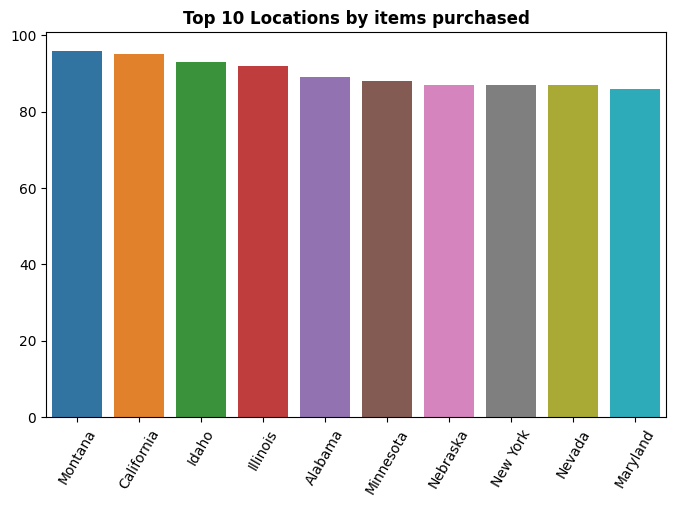

Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Minnesota     88
Nebraska      87
New York      87
Nevada        87
Maryland      86
Name: Location, dtype: int64

In [7]:
top10cnt = df['Location'].value_counts().head(10)
plt.figure(figsize=(8,5))
plt.title('Top 10 Locations by items purchased', fontweight = 'bold')
sns.barplot(x = top10cnt.index, y=top10cnt.values)
plt.xticks(rotation=60)
plt.show()
top10cnt

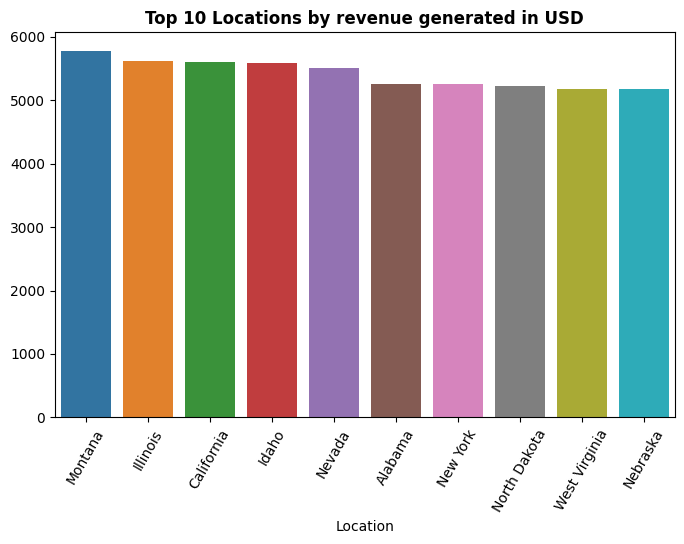

Location
Montana          5784
Illinois         5617
California       5605
Idaho            5587
Nevada           5514
Alabama          5261
New York         5257
North Dakota     5220
West Virginia    5174
Nebraska         5172
Name: Purchase Amount (USD), dtype: int64

In [8]:
top10sum = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
plt.title('Top 10 Locations by revenue generated in USD', fontweight = 'bold')
sns.barplot(x = top10sum.index, y=top10sum.values)
plt.xticks(rotation=60)
plt.show()
top10sum

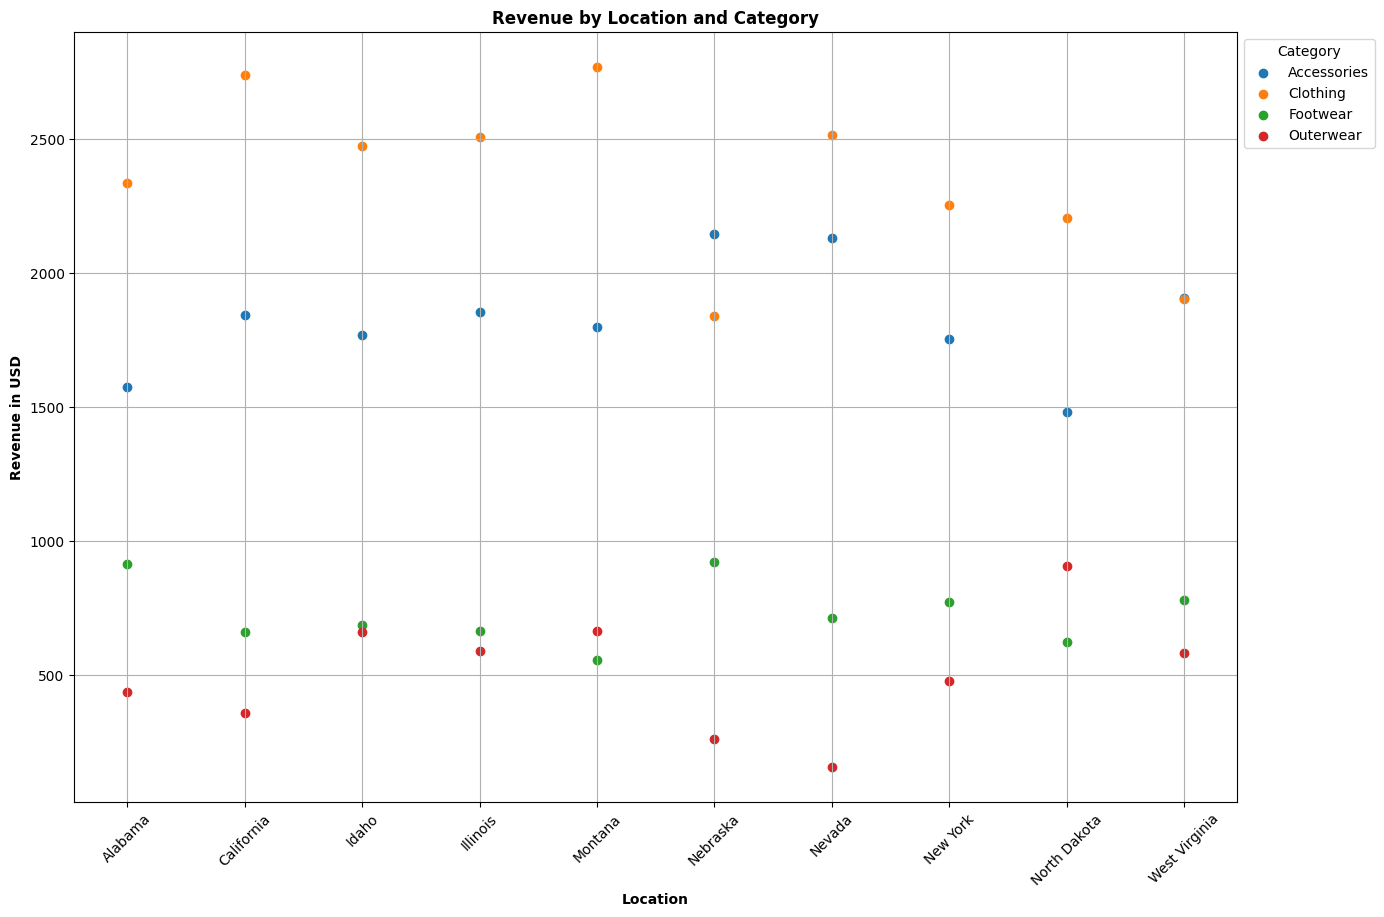

In [9]:
col_list = top10sum.index.values.tolist()
grouped = df.groupby(['Location', 'Category'])['Purchase Amount (USD)'].sum().unstack()
grouped = grouped[grouped.index.isin(col_list)]
fig, ax = plt.subplots(figsize=(15, 10))
for Category in grouped.columns:
    ax.scatter(grouped.index, grouped[Category], label=Category, marker='o')

plt.xlabel('Location', fontweight = 'bold')
plt.ylabel('Revenue in USD', fontweight = 'bold')
plt.title('Revenue by Location and Category', fontweight = 'bold')
plt.xticks(rotation=45)

plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

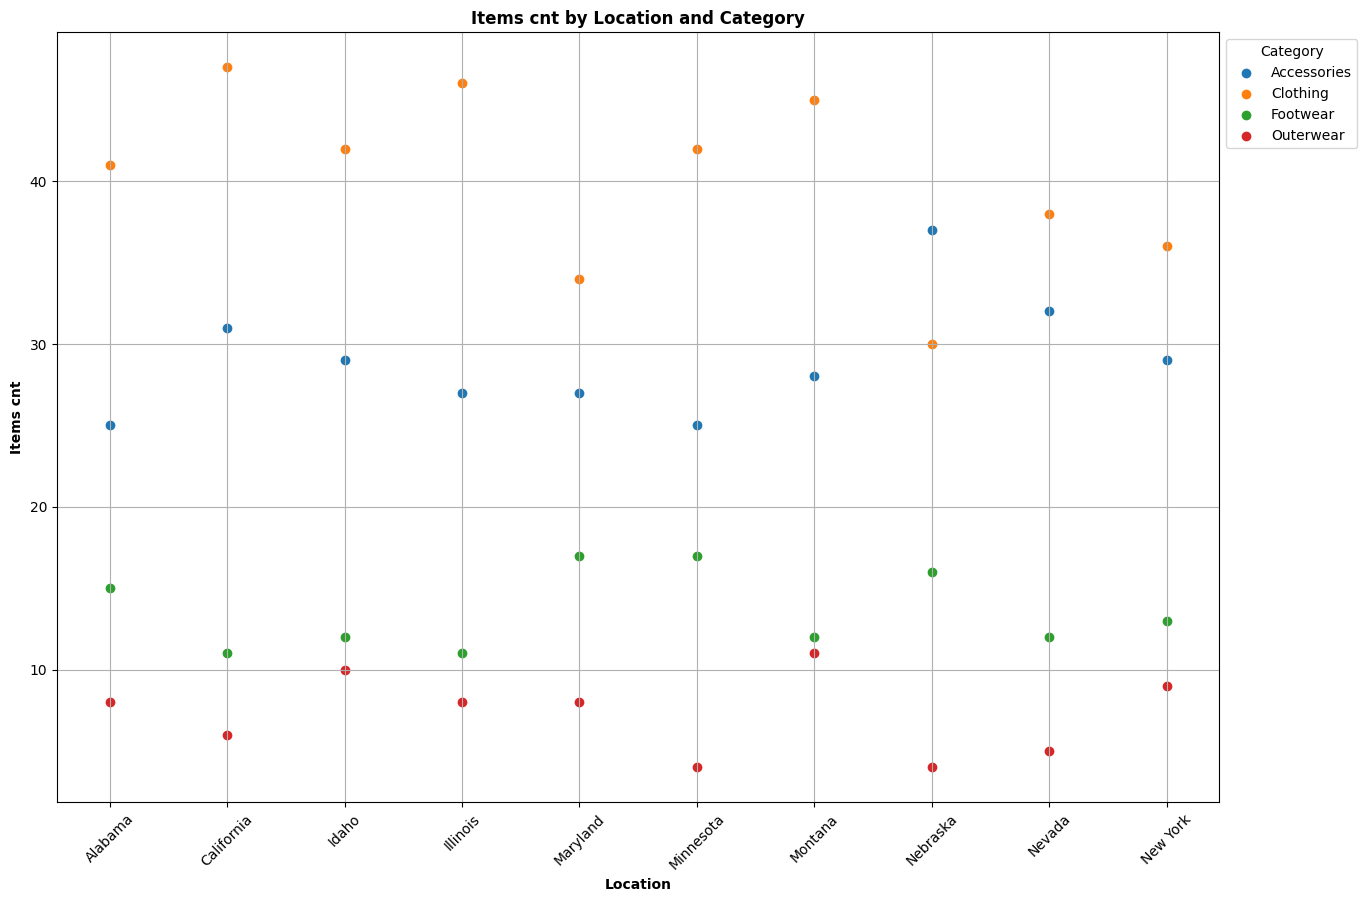

In [10]:
col_list = top10cnt.index.values.tolist()
col_list
grouped = df[['Location', 'Category']]
grouped = grouped.groupby(['Location', 'Category']).value_counts().unstack()
grouped = grouped[grouped.index.isin(col_list)]
fig, ax = plt.subplots(figsize=(15, 10))
for Category in grouped.columns:
    ax.scatter(grouped.index, grouped[Category], label=Category, marker='o')

plt.xlabel('Location', fontweight = 'bold')
plt.ylabel('Items cnt', fontweight = 'bold')
plt.title('Items cnt by Location and Category', fontweight = 'bold')
plt.xticks(rotation=45)

plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

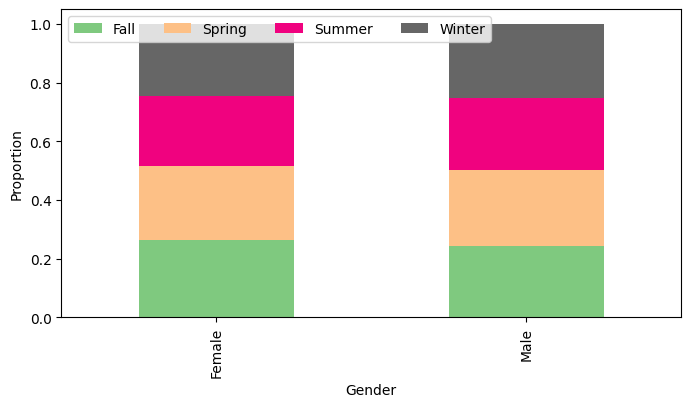

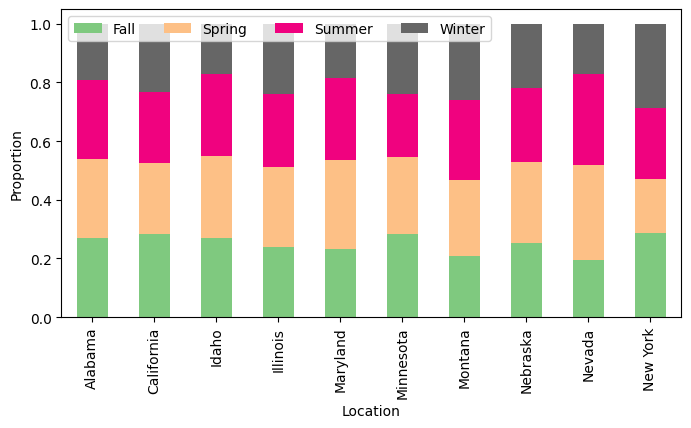

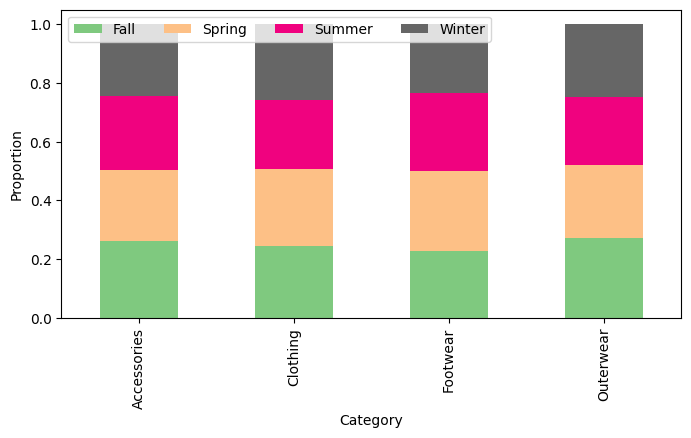

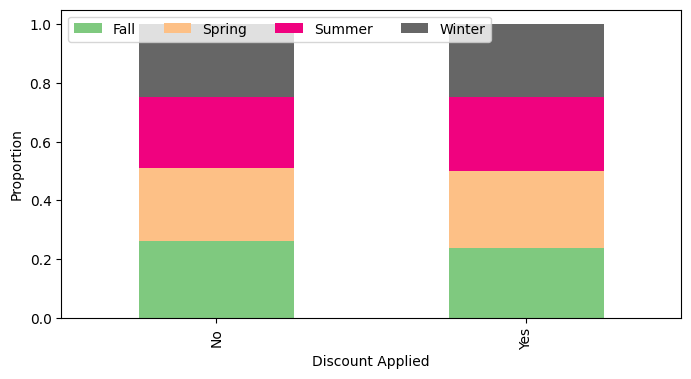

In [11]:
var_list = ['Gender', 'Location', 'Category', 'Discount Applied']
for i in var_list:    
    crosstab = pd.crosstab(index=df[i], columns=df['Season'], normalize='index')
    if i == 'Location':
        crosstab = crosstab[crosstab.index.isin(col_list)]
#    print(crosstab)
#    print('\n')
    crosstab.plot(kind='bar', 
                    stacked=True, 
                    colormap='Accent', 
                    figsize=(8, 4))

    plt.legend(loc="upper left", ncol=4)
    plt.xlabel(i)
    plt.ylabel("Proportion")
    plt.show()

In [12]:
#defining age brackets
conditions = [(df['Age']<= 18),
              (df['Age']>=19) & (df['Age']<=29),
              (df['Age']>=30) & (df['Age']<=39),
              (df['Age']>=40) & (df['Age']<=49),
              (df['Age']>=50) & (df['Age']<=59),
              (df['Age']>=60)]
values = ['0-18', '19-29','30-39', '40-49', '50-59', '60+']
df['Age Bracket'] = np.select(conditions, values)
df.head(20)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Bracket
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,50-59
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,19-29
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50-59
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,19-29
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,40-49
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly,40-49
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly,60+
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly,19-29
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually,19-29
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly,50-59


In [13]:
#defining customer type based on previous purchases
conditions = [(df['Previous Purchases']<= 12),
              (df['Previous Purchases']>=13) & (df['Previous Purchases']<=24),
              (df['Previous Purchases']>=25) & (df['Previous Purchases']<=37),
              (df['Previous Purchases']>=38)]
values = ['New', 'Regular Shopper','Shopping Enthusiast', 'Shopping Addict']
df['seg_customer'] = np.select(conditions, values)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Bracket,seg_customer
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,50-59,Regular Shopper
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,19-29,New
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50-59,Regular Shopper
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,19-29,Shopping Addict
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,40-49,Shopping Enthusiast


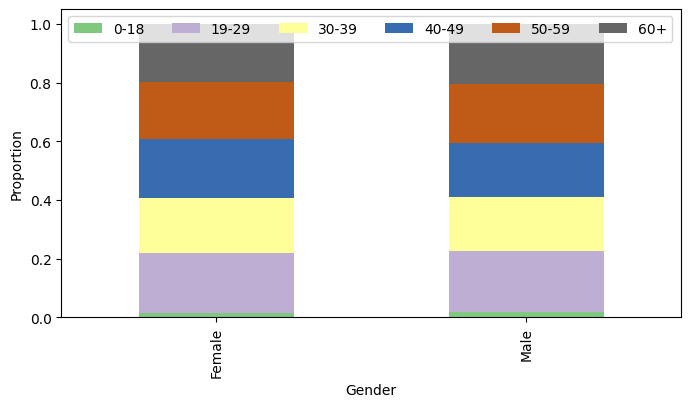

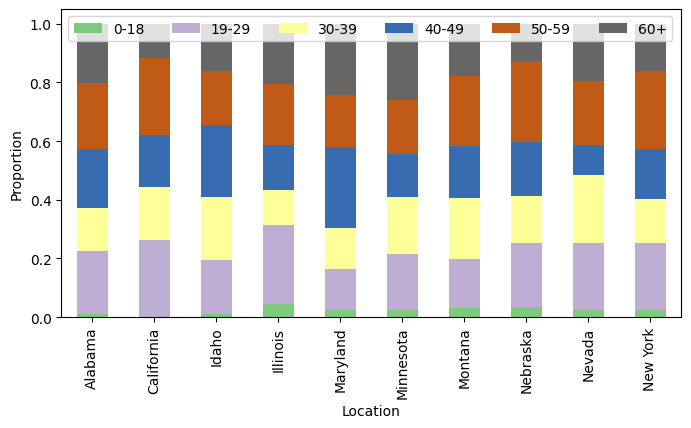

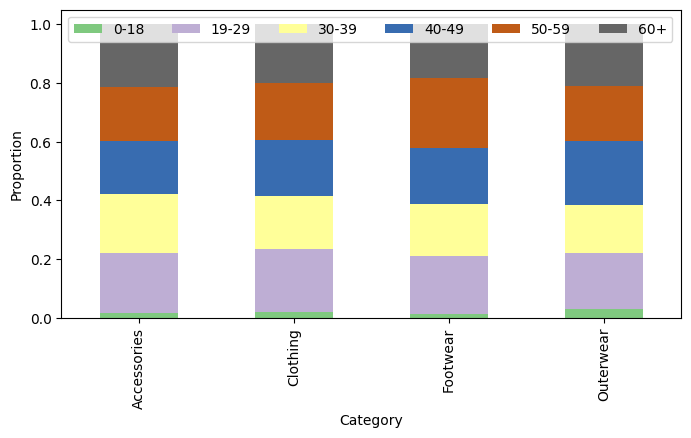

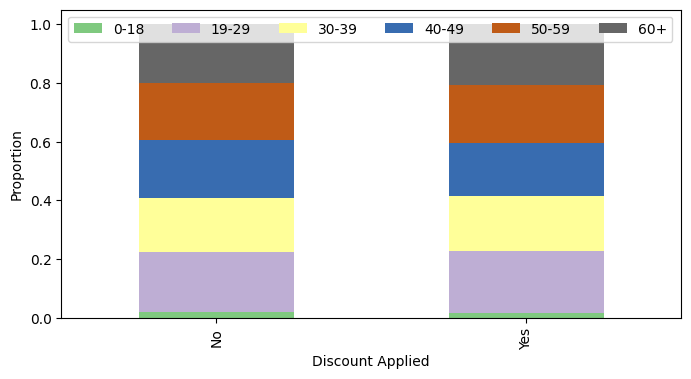

In [14]:
var_list = ['Gender', 'Location', 'Category', 'Discount Applied']
for i in var_list:    
    crosstab = pd.crosstab(index=df[i], columns=df['Age Bracket'], normalize='index')
    if i == 'Location':
        crosstab = crosstab[crosstab.index.isin(col_list)]
#    print(crosstab)
#    print('\n')
    crosstab.plot(kind='bar', 
                    stacked=True, 
                    colormap='Accent', 
                    figsize=(8, 4))

    plt.legend(loc="upper left", ncol=6)
    plt.xlabel(i)
    plt.ylabel("Proportion")
    plt.show()

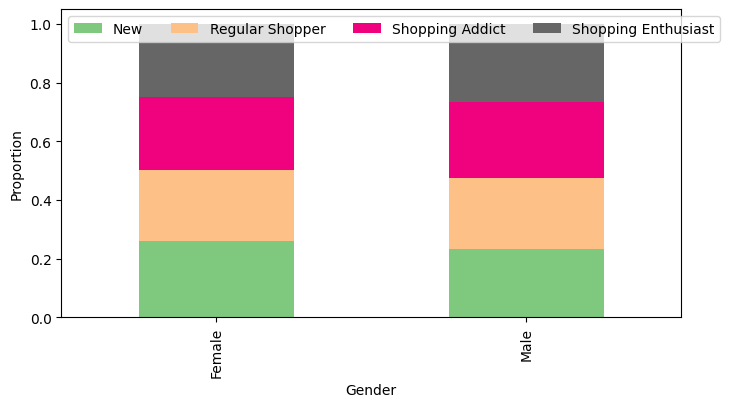

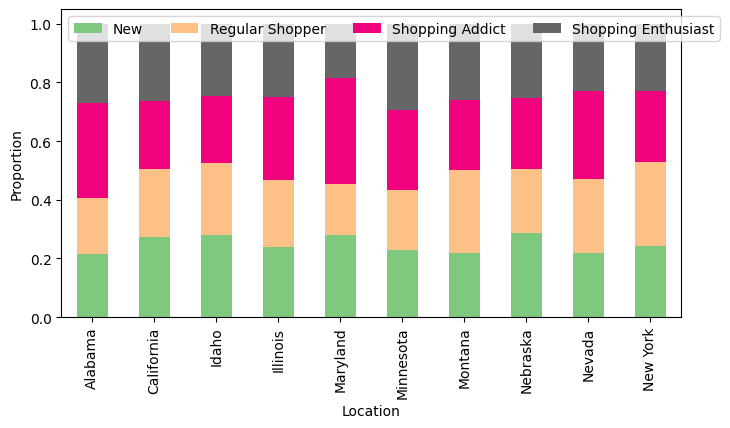

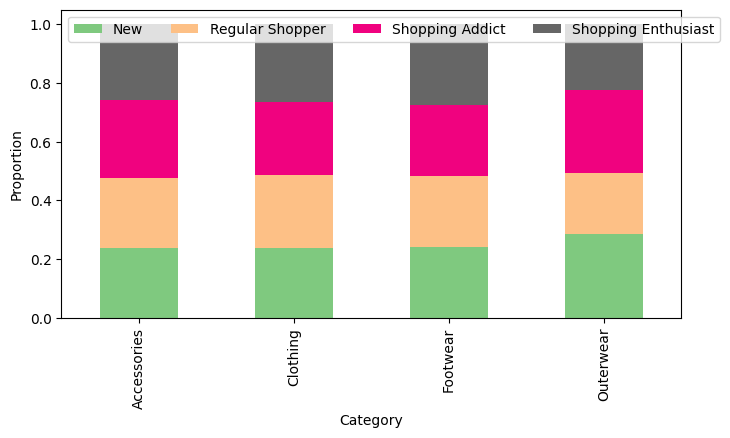

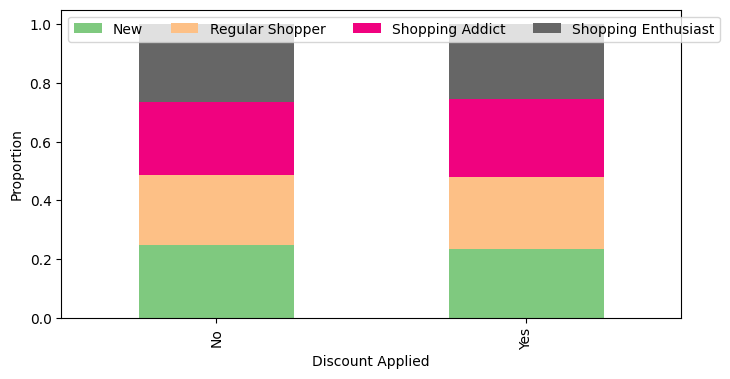

In [15]:
var_list = ['Gender', 'Location', 'Category', 'Discount Applied']
for i in var_list:    
    crosstab = pd.crosstab(index=df[i], columns=df['seg_customer'], normalize='index')
    if i == 'Location':
        crosstab = crosstab[crosstab.index.isin(col_list)]
#    print(crosstab)
#    print('\n')
    crosstab.plot(kind='bar', 
                    stacked=True, 
                    colormap='Accent', 
                    figsize=(8, 4))

    plt.legend(loc="upper left", ncol=4)
    plt.xlabel(i)
    plt.ylabel("Proportion")
    plt.show()

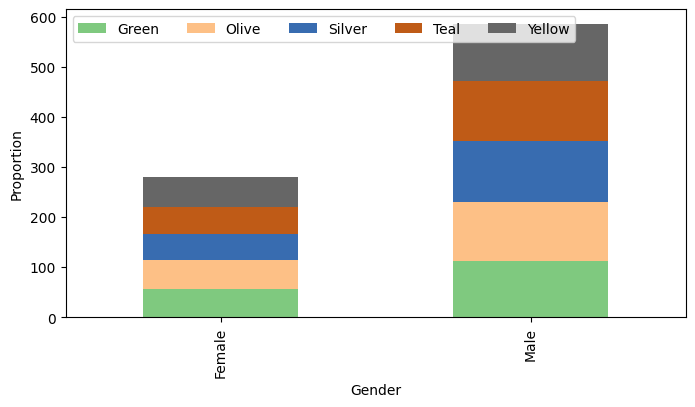

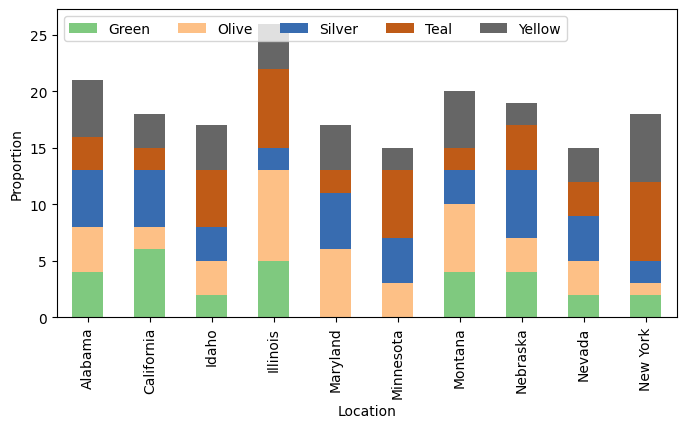

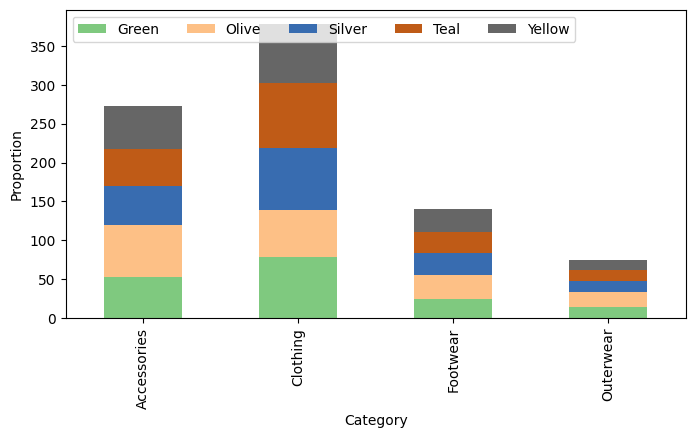

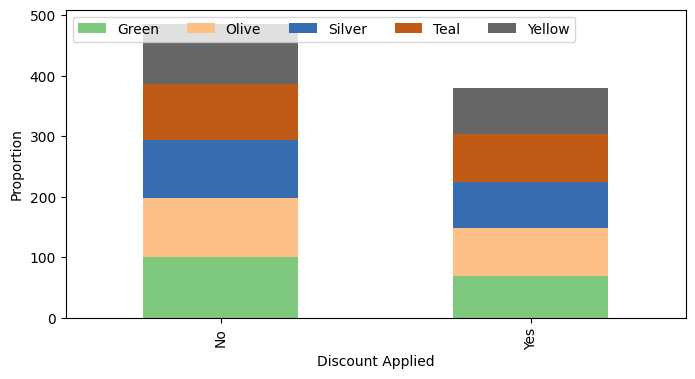

In [16]:
color_list = df['Color'].value_counts().nlargest(5).index.tolist()
var_list = ['Gender', 'Location', 'Category', 'Discount Applied']
for i in var_list:    
    crosstab = pd.crosstab(index=df[i], columns=df['Color'])
    crosstab = crosstab[np.intersect1d(crosstab.columns, color_list)]
    if i == 'Location':
        crosstab = crosstab[crosstab.index.isin(col_list)]
#    print(crosstab)
#    print('\n')
    crosstab.plot(kind='bar', 
                    stacked=True, 
                    colormap='Accent', 
                    figsize=(8, 4))

    plt.legend(loc="upper left", ncol=5)
    plt.xlabel(i)
    plt.ylabel("Proportion")
    plt.show()

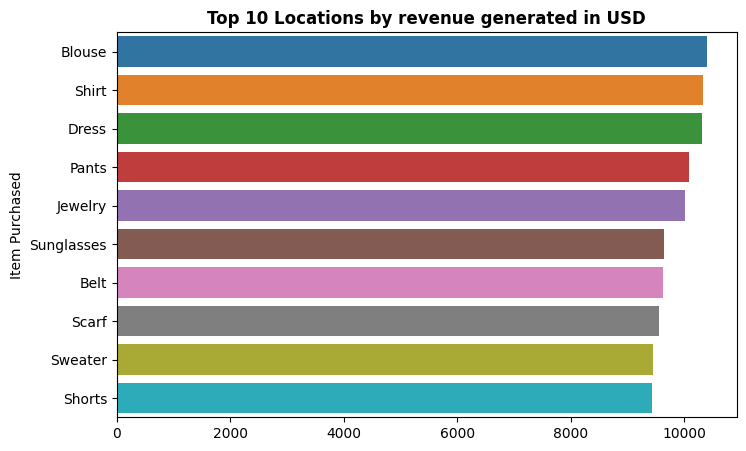

Item Purchased
Blouse        10410
Shirt         10332
Dress         10320
Pants         10090
Jewelry       10010
Sunglasses     9649
Belt           9635
Scarf          9561
Sweater        9462
Shorts         9433
Name: Purchase Amount (USD), dtype: int64

In [21]:
top10sum = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
plt.title('Top 10 Items by revenue generated in USD', fontweight = 'bold')
sns.barplot(x =top10sum.values , y=top10sum.index)
plt.show()
top10sum

In [22]:
df.to_csv("output.csv", index=False)